# Lung Cancer Prediction Project

# Problem Statement:

The objective of this project is to develop a machine learning model to 
predict the likelihood of lung cancer based on a set of given features. Lung 
cancer is one of the leading causes of cancer-related deaths globally, and 
early detection is crucial for effective treatment. By leveraging machine 
learning techniques, we aim to build a predictive model that can assist in 
the early diagnosis of lung cancer, potentially saving lives and improving 
patient outcomes.

# What We Are Trying to Solve:

The primary goal is to predict whether a person has lung cancer based on 
various attributes related to their lifestyle, medical history, and symptoms. 
The prediction model will use the provided dataset to learn patterns and 
relationships between these attributes and the presence of lung cancer. 
The outcomes of this project can be used to raise awareness and 
encourage timely medical consultations for those at higher risk.

# Dataset Information:

The dataset consists of 309 entries with 16 columns. Each row represents 
an individual, and each column represents a specific feature or attribute of 
the individual.

# Column Information:

❖ GENDER: Gender of the individual (M: Male, F: Female)

❖ AGE: Age of the individual

❖ SMOKING: Smoking status (YES = 2, NO = 1)

❖ YELLOW_FINGERS: Presence of yellow fingers, a symptom often associated with smoking (YES = 2, NO = 1)

❖ ANXIETY: Presence of anxiety (YES = 2, NO = 1)

❖ PEER_PRESSURE: Influence of peer pressure (YES = 2, NO = 1)

❖ CHRONIC_DISEASE: Presence of chronic disease (YES = 2, NO = 1)

❖ FATIGUE: Presence of fatigue (YES = 2, NO = 1)

❖ ALLERGY: Presence of allergy (YES = 2, NO = 1)

❖ WHEEZING: Presence of wheezing (YES = 2, NO = 1)

❖ ALCOHOL_CONSUMING: Alcohol consumption status (YES = 2, NO = 1)

❖ COUGHING: Presence of coughing (YES = 2, NO = 1)

❖ SHORTNESS_OF_BREATH: Presence of shortness of breath (YES = 2, NO = 1)

❖ SWALLOWING_DIFFICULTY: Presence of difficulty in swallowing (YES = 2, NO = 1)

❖ CHEST_PAIN: Presence of chest pain (YES = 2, NO = 1)

❖ LUNG_CANCER: Presence of lung cancer (YES, NO)


# Import libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#reading the dataset
df = pd.read_csv('survey lung cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [9]:
df.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL_CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS_OF_BREATH    309 non-null    int64 
 13  SWALLOWING_DIFFICULTY  309 non-null    int64 
 14  CHEST_PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [11]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

In [12]:
df.shape

(309, 16)

In [13]:
type(df)

pandas.core.frame.DataFrame

In [14]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


# Data Cleaning

Check point for duplicate data

In [15]:
df[df.duplicated()]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
99,M,56,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
100,M,58,2,1,1,1,1,1,2,2,2,2,1,1,1,YES
117,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
199,F,55,2,1,1,2,2,2,2,2,2,1,1,2,2,YES
212,M,58,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
223,M,63,2,2,2,1,2,2,2,2,1,1,2,1,1,YES
256,M,60,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
275,M,64,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
284,M,58,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
285,F,58,2,2,2,2,1,2,1,1,1,2,2,2,1,YES


In [16]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(276, 16)

In [17]:
df.iloc[164:165,1:3] 

,AGE,SMOKING
164,62,1


# Check For Null Value

In [18]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

# Data Visualization

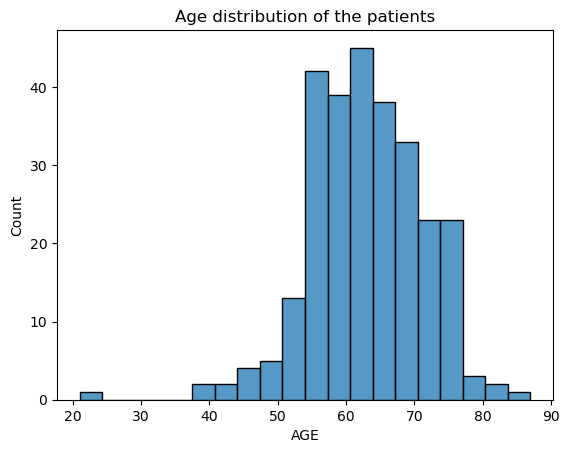

In [19]:
#Age
sns.histplot(df.AGE)
plt.title('Age distribution of the patients')
plt.show()

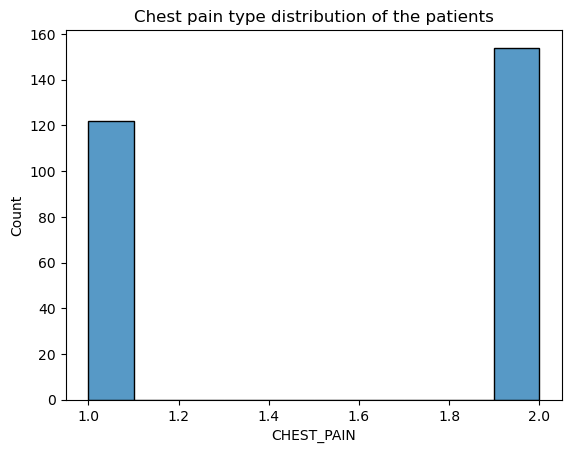

In [20]:
#Chest pain type
sns.histplot(df.CHEST_PAIN)
plt.title('Chest pain type distribution of the patients')
plt.show()

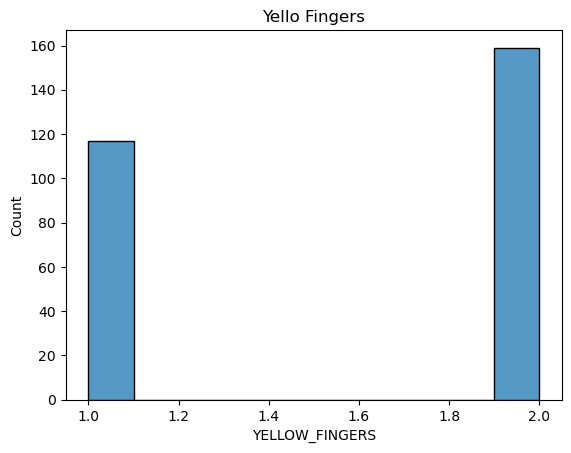

In [22]:
#Resting blood pressure
sns.histplot(df.YELLOW_FINGERS)
plt.title('Yello Fingers')
plt.show()

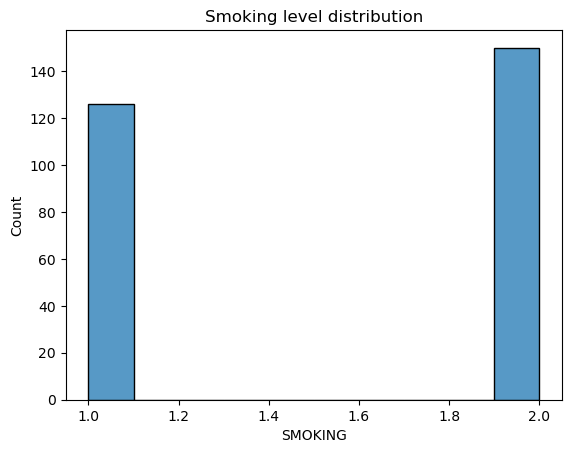

In [23]:
#Cholesterol
sns.histplot(df.SMOKING)
plt.title('Smoking level distribution')
plt.show()

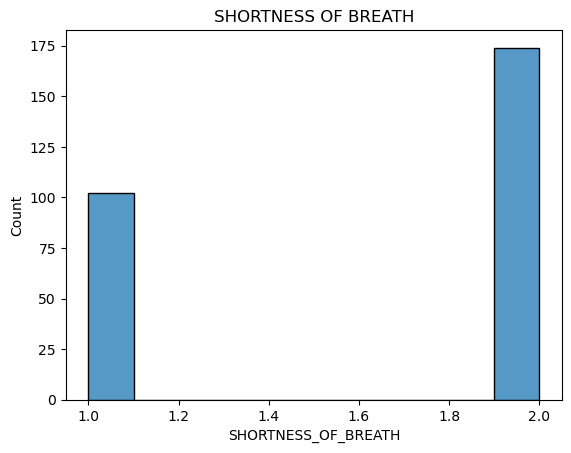

In [24]:
sns.histplot(df.SHORTNESS_OF_BREATH)
plt.title('SHORTNESS OF BREATH')
plt.show()

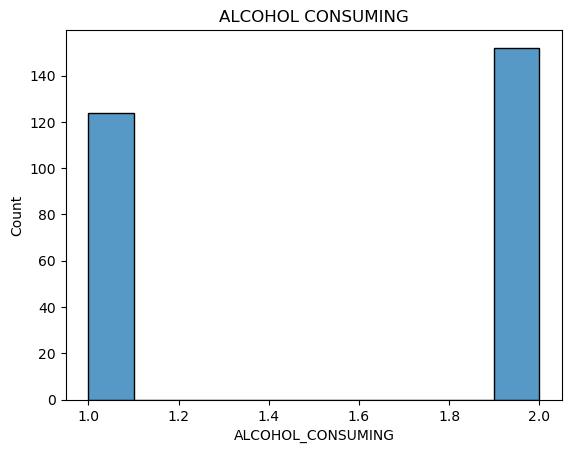

In [25]:
sns.histplot(df.ALCOHOL_CONSUMING)
plt.title('ALCOHOL CONSUMING')
plt.show()

In [26]:
df.SHORTNESS_OF_BREATH.value_counts()

SHORTNESS_OF_BREATH
2    174
1    102
Name: count, dtype: int64

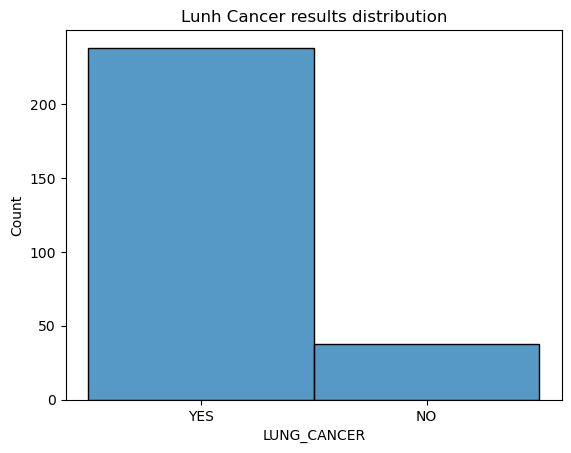

In [27]:
sns.histplot(df.LUNG_CANCER, bins=3)
sns.histplot()
plt.title('Lunh Cancer results distribution')
plt.show()

In [29]:
df.LUNG_CANCER.value_counts()

LUNG_CANCER
YES    238
NO      38
Name: count, dtype: int64

In [52]:
tc = df.drop('LUNG_CANCER', axis =1)
ab = tc.drop('GENDER', axis = 1)
ab

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,59,1,2,2,2,1,1,2,2,1,2,1,2,1
272,59,2,1,1,1,2,2,2,1,1,1,2,1,1
273,55,2,1,1,1,1,2,2,1,1,1,2,1,2
274,46,1,2,2,1,1,1,1,1,1,1,1,2,2


Text(0.5, 1.0, 'Correlation map')

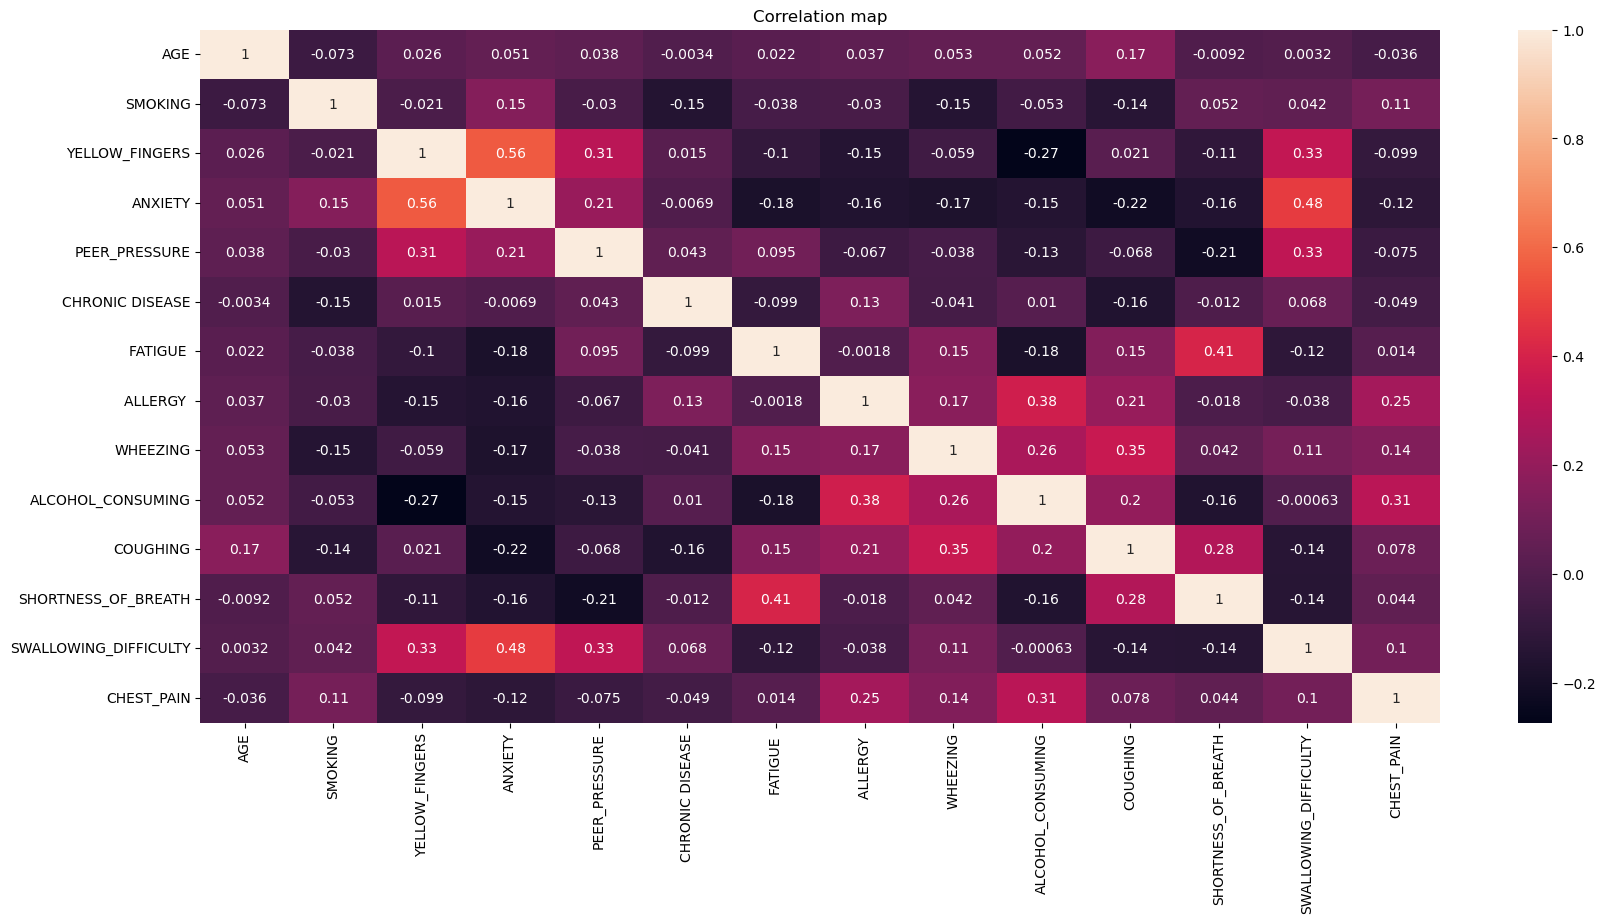

In [53]:
#Finding the correlation
plt.figure(figsize=(20,9));
sns.heatmap(ab.corr(),annot=True);
# sns.heatmap()
plt.title("Correlation map")

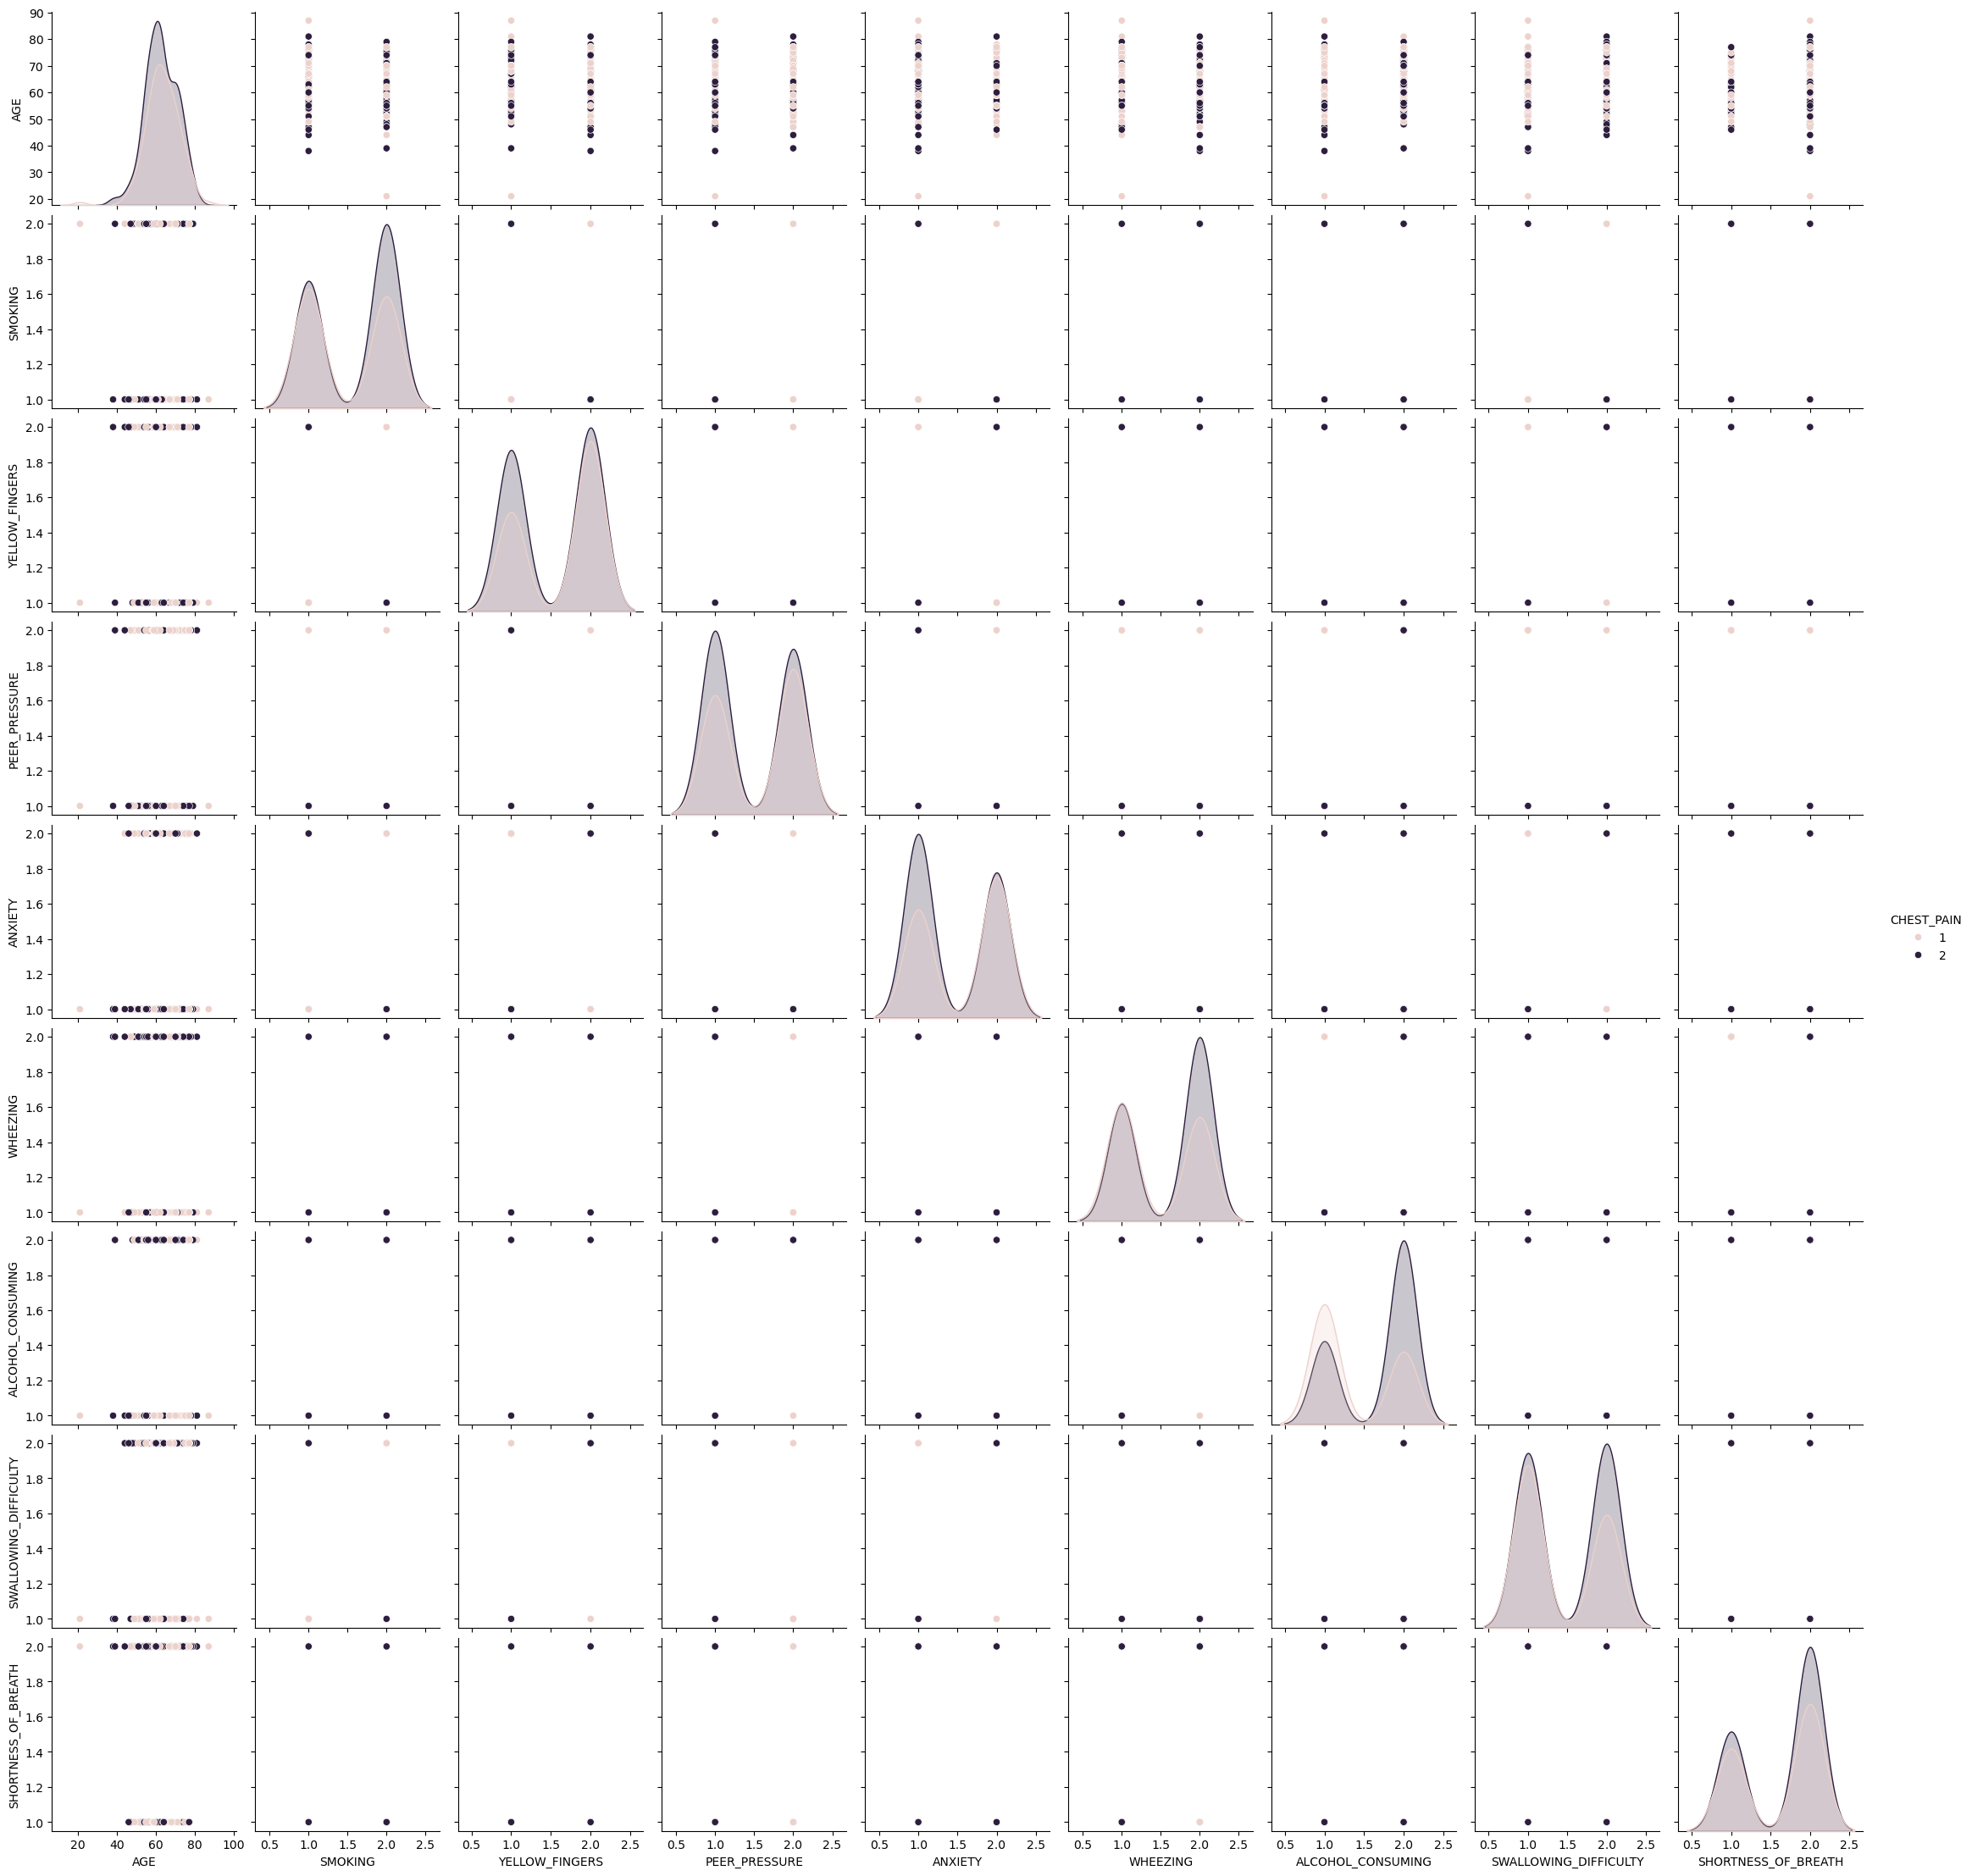

In [39]:
sns.pairplot(df[['AGE','CHEST_PAIN','SMOKING','YELLOW_FINGERS','PEER_PRESSURE','ANXIETY','WHEEZING','ALCOHOL_CONSUMING','SWALLOWING_DIFFICULTY','SHORTNESS_OF_BREATH',]],hue='CHEST_PAIN')

# Feature Scaling 

In [50]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [55]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
df[['AGE']]=scale.fit_transform(df[['AGE']])

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,0.728176,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,1.325964,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,-0.467401,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,0.010830,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,0.010830,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [56]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
df[['AGE']]=scale.fit_transform(df[['AGE']])

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,0.727273,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,0.803030,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,0.575758,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,0.636364,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,0.636364,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# Data Preparation

In [62]:
from sklearn.model_selection import train_test_split # Import train_test_split function

#split dataset in features and target variable

feature_cols = ['AGE', 'SMOKING', 'ANXIETY', 'CHRONIC DISEASE','WHEEZING','ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH','SWALLOWING_DIFFICULTY','CHEST_PAIN']
X = df[feature_cols] # Features
y = df.LUNG_CANCER # Target variable


# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((220, 10), (56, 10), (220,), (56,))

In [63]:
X = df.drop(columns=['LUNG_CANCER'])
y = df['LUNG_CANCER']

In [65]:
X

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
0,M,0.727273,1,2,2,1,1,2,1,2,2,2,2,2,2
1,M,0.803030,2,1,1,1,2,2,2,1,1,1,2,2,2
2,F,0.575758,1,1,1,2,1,2,1,2,1,2,2,1,2
3,M,0.636364,2,2,2,1,1,1,1,1,2,1,1,2,2
4,F,0.636364,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,F,0.575758,1,2,2,2,1,1,2,2,1,2,1,2,1
272,F,0.575758,2,1,1,1,2,2,2,1,1,1,2,1,1
273,M,0.515152,2,1,1,1,1,2,2,1,1,1,2,1,2
274,M,0.378788,1,2,2,1,1,1,1,1,1,1,1,2,2


In [66]:
y

0      YES
1      YES
2       NO
3       NO
4       NO
      ... 
271    YES
272     NO
273     NO
274     NO
275    YES
Name: LUNG_CANCER, Length: 276, dtype: object

In [67]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

LogisticRegression()

In [68]:
y_pred = logreg.predict(X_test)
y_pred

array(['YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES'], dtype=object)

In [69]:
for i in range(len(X_test)):
               print(logreg.predict_proba(X_test)[i])

[0.05713471 0.94286529]
[0.05328984 0.94671016]
[0.10114568 0.89885432]
[0.01296515 0.98703485]
[0.01016858 0.98983142]
[0.01976677 0.98023323]
[0.06393934 0.93606066]
[0.13198511 0.86801489]
[0.13301932 0.86698068]
[0.02114897 0.97885103]
[0.10775415 0.89224585]
[0.01183663 0.98816337]
[0.07559019 0.92440981]
[0.07623676 0.92376324]
[0.09622765 0.90377235]
[0.11135288 0.88864712]
[0.40374393 0.59625607]
[0.01838356 0.98161644]
[0.00145562 0.99854438]
[0.45691605 0.54308395]
[0.07077524 0.92922476]
[0.00211561 0.99788439]
[0.07388436 0.92611564]
[0.01949823 0.98050177]
[0.01074055 0.98925945]
[0.01772994 0.98227006]
[0.09731903 0.90268097]
[0.08259588 0.91740412]
[0.20688717 0.79311283]
[0.13304464 0.86695536]
[0.0359015 0.9640985]
[0.0283264 0.9716736]
[0.09511139 0.90488861]
[0.12433209 0.87566791]
[0.02597432 0.97402568]
[0.02894104 0.97105896]
[0.28248504 0.71751496]
[0.26542983 0.73457017]
[0.07258079 0.92741921]
[0.0120542 0.9879458]
[0.25256207 0.74743793]
[0.10599463 0.89400537

In [71]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

0.9821428571428571

In [72]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 0,  1],
       [ 0, 55]], dtype=int64)

In [74]:
import warnings

warnings.filterwarnings('ignore')

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          NO       0.00      0.00      0.00         1
         YES       0.98      1.00      0.99        55

    accuracy                           0.98        56
   macro avg       0.49      0.50      0.50        56
weighted avg       0.96      0.98      0.97        56



# Decision Tree Classifier

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

def mymodel(model):
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    print(classification_report(y_test,y_pred))
    return model
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

          NO       0.00      0.00      0.00         1
         YES       0.98      1.00      0.99        55

    accuracy                           0.98        56
   macro avg       0.49      0.50      0.50        56
weighted avg       0.96      0.98      0.97        56



In [76]:
df1=DecisionTreeClassifier(max_depth=10)
mymodel(df1)

              precision    recall  f1-score   support

          NO       0.00      0.00      0.00         1
         YES       0.98      1.00      0.99        55

    accuracy                           0.98        56
   macro avg       0.49      0.50      0.50        56
weighted avg       0.96      0.98      0.97        56



DecisionTreeClassifier(max_depth=10)

In [77]:
for i in range(1,50):
    df1=DecisionTreeClassifier(max_depth=i)
    df1.fit(X_train,y_train)
    ypred=df1.predict(X_test)
    print(f"{i}: {accuracy_score(y_test,y_pred)}")

1: 0.9821428571428571
2: 0.9821428571428571
3: 0.9821428571428571
4: 0.9821428571428571
5: 0.9821428571428571
6: 0.9821428571428571
7: 0.9821428571428571
8: 0.9821428571428571
9: 0.9821428571428571
10: 0.9821428571428571
11: 0.9821428571428571
12: 0.9821428571428571
13: 0.9821428571428571
14: 0.9821428571428571
15: 0.9821428571428571
16: 0.9821428571428571
17: 0.9821428571428571
18: 0.9821428571428571
19: 0.9821428571428571
20: 0.9821428571428571
21: 0.9821428571428571
22: 0.9821428571428571
23: 0.9821428571428571
24: 0.9821428571428571
25: 0.9821428571428571
26: 0.9821428571428571
27: 0.9821428571428571
28: 0.9821428571428571
29: 0.9821428571428571
30: 0.9821428571428571
31: 0.9821428571428571
32: 0.9821428571428571
33: 0.9821428571428571
34: 0.9821428571428571
35: 0.9821428571428571
36: 0.9821428571428571
37: 0.9821428571428571
38: 0.9821428571428571
39: 0.9821428571428571
40: 0.9821428571428571
41: 0.9821428571428571
42: 0.9821428571428571
43: 0.9821428571428571
44: 0.98214285714285

In [78]:
df3=DecisionTreeClassifier(max_depth=5)
mymodel(df3)

              precision    recall  f1-score   support

          NO       0.00      0.00      0.00         1
         YES       0.98      1.00      0.99        55

    accuracy                           0.98        56
   macro avg       0.49      0.50      0.50        56
weighted avg       0.96      0.98      0.97        56



DecisionTreeClassifier(max_depth=5)

In [79]:
from sklearn.ensemble import RandomForestClassifier
my_rf_classifier = RandomForestClassifier()

my_rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [80]:
my_predictions = my_rf_classifier.predict(X_test)

print(accuracy_score(y_test, my_predictions))

0.9464285714285714


In [81]:
print(classification_report(y_test, my_predictions))

              precision    recall  f1-score   support

          NO       0.25      1.00      0.40         1
         YES       1.00      0.95      0.97        55

    accuracy                           0.95        56
   macro avg       0.62      0.97      0.69        56
weighted avg       0.99      0.95      0.96        56



# 1. Model Comparison Report
This requires comparing multiple machine learning models to determine which performs best on the given dataset. Here's how to approach this:

# Step 1: Data Preparation

Perform data cleaning (e.g., handling missing values, encoding categorical features like GENDER and LUNG_CANCER, normalizing numerical data such as AGE).
# Step 2: Exploratory Data Analysis (EDA)

Analyze correlations between features and the target variable (LUNG_CANCER).
Visualize data distributions to spot potential outliers.
# Step 3: Model Training and Testing

Split the dataset into training and testing sets (e.g., 80% train, 20% test).
Train multiple models such as Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVM), and Gradient Boosting.
# Step 4: Model Evaluation

Evaluate models using metrics like accuracy, precision, recall, F1-score, and AUC-ROC. Cross-validation can also improve reliability.
# Step 5: Report Findings

Tabulate performance metrics.
Suggest the best model for production based on its performance and explain why (e.g., Random Forest for its balance of accuracy and interpretability).
# 2. Report on Challenges Faced
This section should address the issues encountered during the project and the techniques used to resolve them. Potential challenges include:

# Imbalanced Data

# Problem: 
If lung cancer cases (YES) are significantly fewer than non-cancer cases (NO).
# Solution: Use oversampling techniques like SMOTE (Synthetic Minority Oversampling Technique) or undersampling to balance the dataset.
Feature Importance

# Problem: 
Identifying the most significant features influencing the prediction.
# Solution: 
Use feature selection techniques like Recursive Feature Elimination (RFE) or analyze feature importance from tree-based models.

# Data Encoding

# Problem: 
Non-numeric data like GENDER and LUNG_CANCER must be converted into numeric format.
# Solution: 
Use one-hot encoding or label encoding as appropriate.

# Overfitting

# Problem: 
Some models might perform well on the training data but poorly on unseen data.
# Solution: 
Implement regularization techniques (L1/L2) or use simpler models and cross-validation.

# Interpretability vs. Accuracy

# Problem: 
Models like Random Forest and Gradient Boosting might achieve high accuracy but are harder to interpret compared to Logistic Regression.
# Solution: 
Use tools like SHAP (SHapley Additive exPlanations) for interpretability.

# CHOOSING MODEL FOR USE

# 1. Linear Regression
Not Suitable: Linear regression is designed for continuous target variables and is not ideal for binary classification tasks. While it can technically be used with thresholding (e.g., predict >0.5 as "YES"), it lacks the robustness of classification-specific models.
# 2. Decision Tree
Suitability:

Decision Trees are a great choice for binary classification tasks like this. They can handle both numerical and categorical features without requiring extensive preprocessing.
They also provide interpretability by showing which features drive predictions.
However, they are prone to overfitting, especially on smaller datasets.
Recommendation:
Use Decision Trees as a baseline and consider tuning hyperparameters like max_depth or min_samples_split to reduce overfitting. You can also extend to Random Forest for better performance.

# 3. k-Nearest Neighbors (kNN)
Suitability:

kNN is simple and effective for small datasets like this (309 samples). It works well if the data is well-distributed and there are clear clusters for the two classes.
However, it can be sensitive to the choice of k (number of neighbors) and does not perform well with high-dimensional or imbalanced datasets.
Recommendation:
Use kNN for comparison but ensure proper scaling of features (e.g., AGE) and tune k using cross-validation. It may be computationally expensive with larger datasets.

# 4. Logistic Regression (Alternative)
Suitability:

Logistic Regression is well-suited for binary classification tasks like this. It provides probabilistic outputs and performs well when features have linear relationships with the target.
It's easy to implement and interpretable but may struggle if the relationships are non-linear.
Recommendation:
Use Logistic Regression for baseline evaluation. Ensure that the dataset is scaled if necessary, and consider using regularization (L1 or L2).

# Best Overall Approach
Based on the size of the dataset and the need for interpretability, Decision Trees would likely perform best for initial exploration. However:
If you want better generalization and reduced overfitting, consider Random Forest or Gradient Boosting models (e.g., XGBoost, LightGBM).
If the dataset is imbalanced, include techniques like SMOTE with these models.